<a href="https://colab.research.google.com/github/DiegoGomez10/egg/blob/main/ProyectoDS_Parte1_GomezDiego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hola me presento, soy Diego Gomez y el dataset que eleji es sobre el hundimiento del Titanic
el mismo cuenta con las siguientes columnas:

_survival: esta columna nos muestra si las personas sobrevivieron o no al Titanic, e donde el valor "1" significa que sobrevivio y el valor "0" que no sobrevivio

_pclass:	esta columna nos nuestra las distintas clases socioeconomicos dentro del Titanic donde "1" significa que pertenece a una clase alta, "2" que pertenece a una clase media y "3" que pertenece a una clase baja

_sex: esta columna nos muestra el sexo de los pasajeros en donde "female" es para femenino y "male" para masculino

_Age: nos muestra las distintas edades de los pasajeros

_sibsp: esta columna nos muestra las distintas relaciones familiasres
donde:
"0" representa a hermanos: hermanos, hermanas,hermanastros y hermanastras
"1" representa a conyuge: marido,esposa

_parch: esta columna nos muestra las distintas relaciones familiasres
donde:
"0" representa a Padres= madre, padre
"1" representa a Niños = hija, hijo, hijastra, hijastro
*Algunos niños viajaron sólo con una niñera, por lo tanto parch=0 para ellos.

_fare:	esta columna representa el valor de la tarifa

_cabin: esta columna representa el numero de cabina en donde viajaban

_embarked:	esta columna representa el puerto desde donde se embarcaron
C = Cherbourg, Q = Queenstown, S = Southampton


*hipotesis:

1_Hipótesis sobre la supervivencia según la clase social (Pclass) : ¿Existe una relacion entre la clase socioeconómica de los pasajeros (representada por la columna Pclass) y sus tasas de supervivencia? Por ejemplo, podrías hipotetizar que los pasajeros de primera clase tuvieran una mayor probabilidad de supervivencia en comparación con los de segunda o tercera clase.

2_Hipótesis sobre la supervivencia según el género (Sex) : ¿Hubo una diferencia significativa en las tasas de supervivencia entre hombres y mujeres? Podrías explorar si las mujeres tenían una probabilidad de supervivencia mayor que los hombres, posiblemente debido a la priorización en el acceso a los botes salvavidas.

3_Hipótesis sobre la supervivencia según la edad (Age) : ¿Existe alguna relación entre la edad de los pasajeros y sus posibilidades de sobrevivir? Por ejemplo, podrías investigar si los niños tenían más probabilidades de sobrevivir en comparación con los adultos o los ancianos.

4_Hipótesis sobre la supervivencia según el tamaño de la familia (SibSp y Parch) : ¿Influyó el tamaño de la familia de un pasajero (representado por las columnas SibSp y Parch, que indican el número de hermanos/cónyuges y padres/hijos a bordo, respectivamente) en sus probabilidades de supervivencia? Podrías investigar si los pasajeros que viajaban solos tenían más o menos probabilidades de sobrevivir que aquellos que viajaban con familiares.

5_Hipótesis sobre la influencia del puerto de embarque (Embarked) : ¿Hubo alguna diferencia en las tasas de supervivencia entre los pasajeros que embarcaron en diferentes puertos (representados por la columna Embarked)? Podrías explorar si el puerto de embarque tuviera algún impacto en la probabilidad de supervivencia de los pasajeros**



In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# se importa el dataset con la funcion read_csv de pandas
titanic_data= pd.read_csv("train.csv", sep=",")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
# se hace un chequeo de los valores nulos
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
# se elimina la columna "Cabin" porque contiene demasiados NaN (687/891)
# por lo cual no sirve para obtener alguna informacion
titanic_data=titanic_data.drop(columns="Cabin", axis=1)

In [27]:
titanic_data["Age"].mean()

29.69911764705882

In [ ]:
# remplazamos los valores NaN por la media de las edades
titanic_data["Age"].fillna(titanic_data["Age"].mean(), inplace=True)
titanic_data

In [30]:
# lo que hacemos ahora es encontrar el modo para remplazar los valores NaN de Embarked
titanic_data["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [32]:
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0], inplace=True)

In [33]:
# una ves remplazados los valores NaN ya se puede empezar a operar
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [91]:
titanic_data["Parch"].sum()

340

In [34]:
# se utiliza esta funcion como un resumen de los valores de la media, mediana, cuartiles
# desvio estandar y valores maximos y minimos
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
matriz_titanic=titanic_data.corr().abs()

<Axes: >

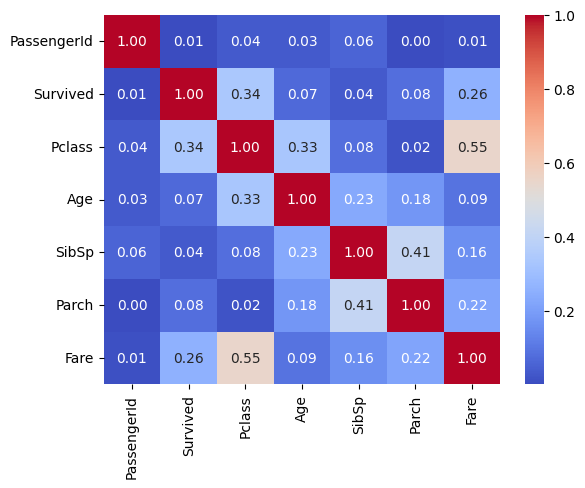

In [36]:
# se utiliza la matriz previamente generada para mostrar las correlaciones
# entre las distintas variables
sns.heatmap(matriz_titanic,annot=True, cmap="coolwarm", fmt=".2f")

In [39]:
# buscamos la cantidad de pasajeros que sobrevivieron al titanic
# 1= sobrevivieron , 2=no sobrevivieron
titanic_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

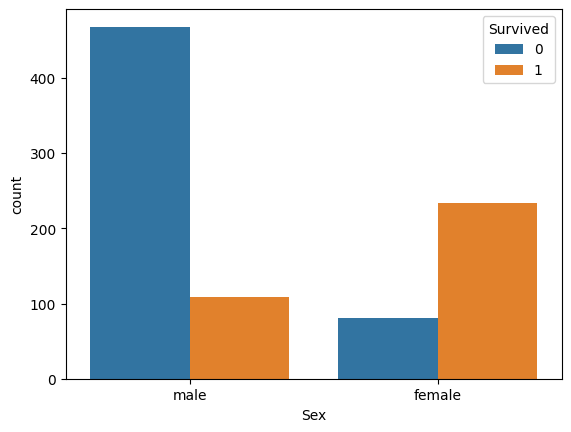

In [57]:
# numero de sobrevivientes segun el sexo
sns.countplot(data=titanic_data, x="Sex", hue="Survived")

<Axes: xlabel='Survived', ylabel='count'>

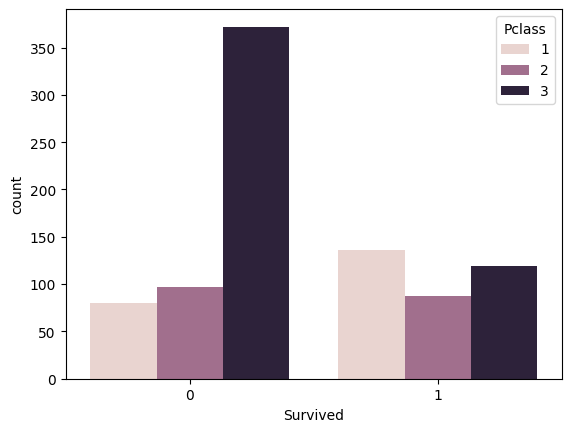

In [65]:
# cantidad de personas que sobrevivieron segun la clase social
sns.countplot(x=titanic_data["Survived"], hue=titanic_data["Pclass"])

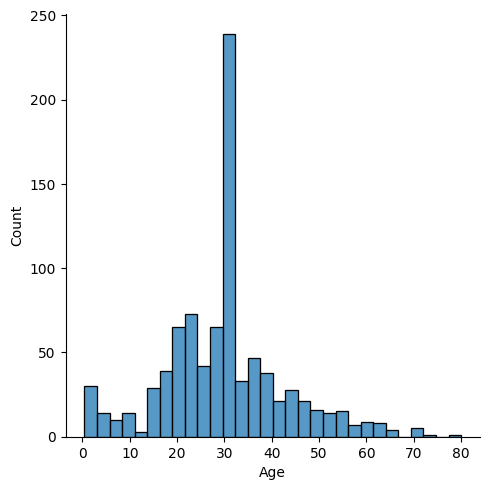

In [73]:
## distrubicion de edades de personas dentro del titanic
sns.displot(titanic_data["Age"])

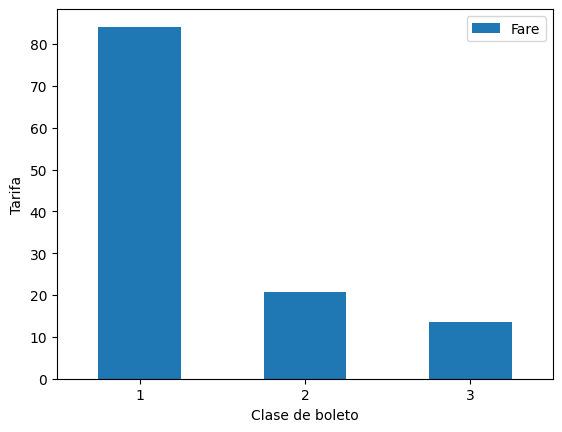

In [88]:
# comparacion entre las tarifas y las clases
class_fare=titanic_data.pivot_table(index="Pclass",values="Fare")
class_fare.plot(kind="bar")
plt.xlabel("Clase de boleto")
plt.ylabel("Tarifa")
plt.xticks(rotation=0)
plt.show()
# se puede apreciar que el promedio del boleto de primera clase es mucho mas alto que el de tercera clase

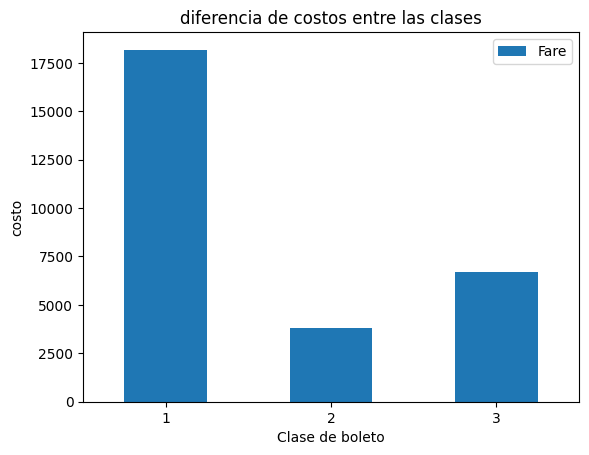

In [90]:
class_fare=titanic_data.pivot_table(index="Pclass",values="Fare", aggfunc=np.sum)
class_fare.plot(kind="bar")
plt.title("diferencia de costos entre las clases")
plt.xlabel("Clase de boleto")
plt.ylabel("costo")
plt.xticks(rotation=0)
plt.show()
# diferencia entre el costo de primera clase, segunda y tercera